In [1]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
import os
from scipy import integrate
from scipy.stats import norm


import astropy.coordinates as coord
import astropy.units as u
from scipy import integrate, optimize

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# graphic parameters
plt.rcParams['font.size'] = 19
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['axes.linewidth']  = 1.4
plt.rcParams['figure.figsize']  = (8, 4)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 1.8
plt.rcParams['ytick.major.width'] = 1.8   
plt.rcParams['lines.markeredgewidth'] = 2

# defining a numpy seed for random
np.random.seed(0)

# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 400     # resolution of saved images
formatIm = '.pdf'  # format of saved images

# ----- some constants ----- #
G     = 6.6743e-8     # gravitational constant
kb    = 1.3807e-16    # Boltzmann constant
sigma = 5.67e-5       # Stefan-Boltzmann constant
Msun  = 1.9884e33     # sun mass
Rsun  = 6.957e10      # sun radius
m_H   = 1.6726e-24    # mass of the proton/hydrogen
m_e   = 9.1094e-28    # mass of the electron
c     = 2.9979e10     # speed of light
Na    = 6.022140e22   # avogadro number
aRad  = 7.5657e-15    # radiation constant
hPl   = 6.6261e-27    # planck constant
ech   = 4.8032e-10    # electron charge
hbar  = 1.0546e-27

In [2]:
def plot_square(center, side, ax):
    # Calculate the coordinates of the square's corners
    half_side = side / 2
    x_left = center[0] - half_side
    x_right = center[0] + half_side
    y_bottom = center[1] - half_side
    y_top = center[1] + half_side
    
    # Plot the square using Matplotlib
    
    c = 'k'
    lw = .8
    
    ax.plot([x_left, x_right], [y_top, y_top], color=c, lw=lw)   # top side
    ax.plot([x_right, x_right], [y_top, y_bottom], color=c, lw=lw)   # right side
    ax.plot([x_right, x_left], [y_bottom, y_bottom], color=c, lw=lw)   # bottom side
    ax.plot([x_left, x_left], [y_bottom, y_top], color=c, lw=lw)   # left side
    

def fill_square(center, side, ax):
    # Calculate the coordinates of the square's corners
    half_side = side / 2
    x_left = center[0] - half_side
    x_right = center[0] + half_side
    y_bottom = center[1] - half_side
    y_top = center[1] + half_side
    
    # Generate an array of x values to fill between
    x = np.linspace(x_left, x_right, 100)
    
    # Fill the area inside the square using Matplotlib
    c = 'lightgray'
    ax.fill_between(x, y_bottom, y_top, color=c)
    


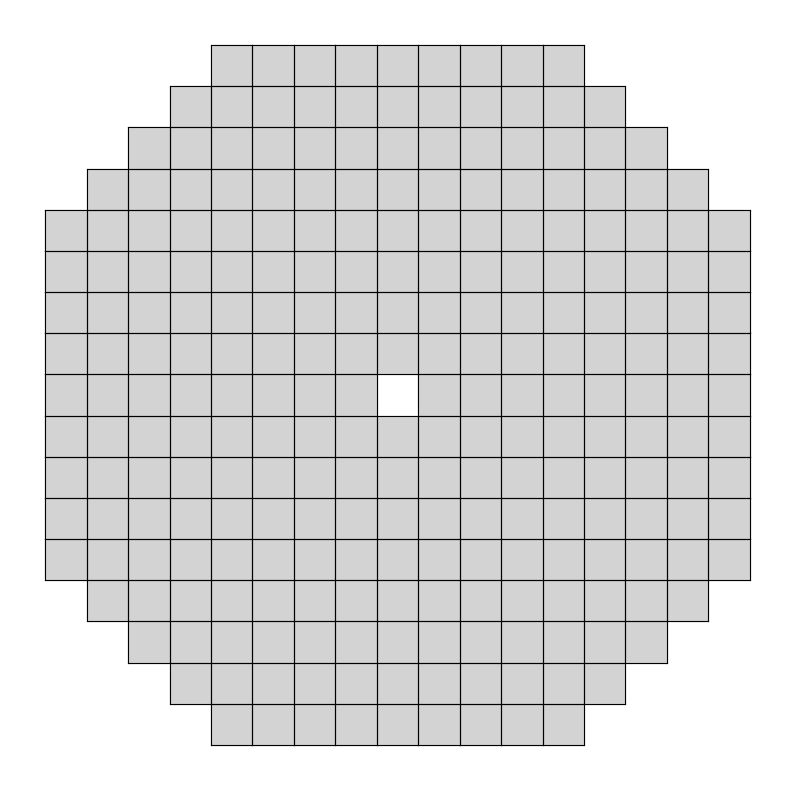

In [3]:
radii = 1

fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.arange(-8, 9), np.arange(-8, 9)

for x in X:
    for y in Y:
        
        if [x, y] != [0, 0] and np.sqrt(x**2+y**2)<9.2:
            plot_square([x,y], radii, ax)
            fill_square([x,y], radii, ax)


plt.axis('off')

plt.savefig(f'{pltpath}MAGIC{formatIm}', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()

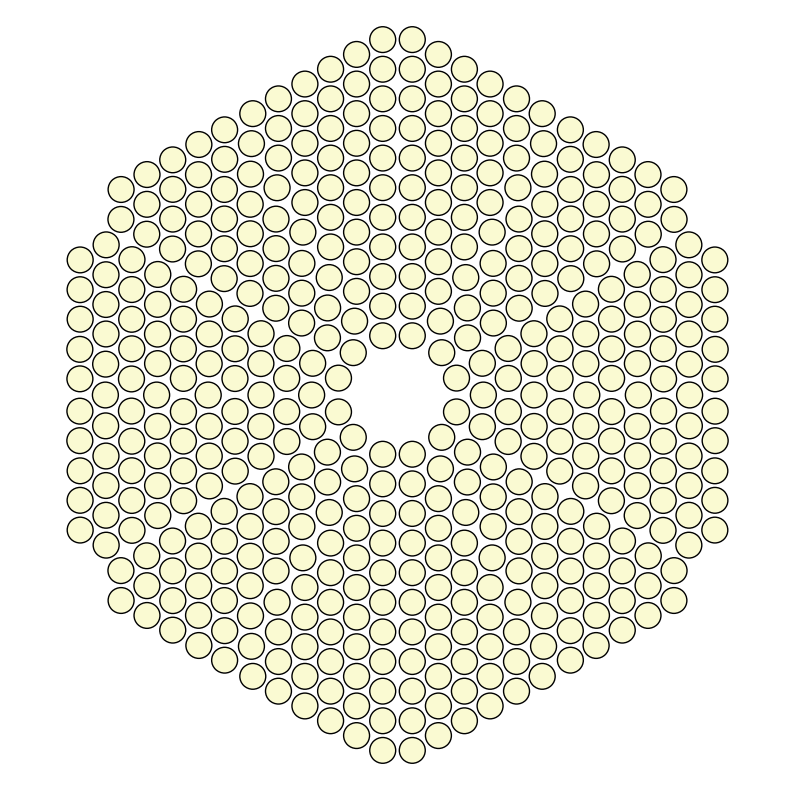

In [10]:
radii = 0.87/2
fact = 1.2
lw = 
cl = 'lightgoldenrodyellow'

fig, ax = plt.subplots(figsize=(10, 10))


angles = np.deg2rad([90, 270])
for angle in angles:
    r = np.arange(2, 13)
    
    X = r * np.cos(angle)
    Y = r * np.sin(angle)

    for x, y in zip(X, Y):
        for sep in [-radii*fact*0.95, radii*fact*0.95]:
            
            circle1 = plt.Circle((x + np.sin(angle) * sep, y - np.cos(angle) * sep), radii, color=cl, ec='k', lw=lw)
            ax.add_patch(circle1)
            
angles = np.deg2rad([30, 150, 210, 330])
for angle in angles:
    r = np.arange(2, 13)[:-1]
    
    X = r * np.cos(angle)
    Y = r * np.sin(angle)

    for x, y in zip(X, Y):
        for sep in [-radii*fact*0.95, radii*fact*0.95]:
            
            circle1 = plt.Circle((x + np.sin(angle) * sep, y - np.cos(angle) * sep), radii, color=cl, ec='k', lw=lw)
            ax.add_patch(circle1)
            
ff = 2.63
angles = np.deg2rad([30, 90, 150, 210, 270, 330])
for angle in angles:
    r = np.arange(2, 13)[2:]
    
    X = (r - 0.5) * np.cos(angle)
    Y = (r - 0.5) * np.sin(angle)

    for x, y in zip(X, Y):
        for sep in [-radii*fact*ff, radii*fact*ff]:
            
            circle1 = plt.Circle((x + np.sin(angle) * sep, y - np.cos(angle) * sep), radii, color=cl, ec='k', lw=lw)
            ax.add_patch(circle1)
ff = 4.3
angles = np.deg2rad([30, 90, 150, 210, 270, 330])
for angle in angles:
    r = np.arange(2, 13)[4:]
    
    X = (r - 1) * np.cos(angle)
    Y = (r - 1) * np.sin(angle)

    for x, y in zip(X, Y):
        for sep in [-radii*fact*ff, radii*fact*ff]:
            
            circle1 = plt.Circle((x + np.sin(angle) * sep, y - np.cos(angle) * sep), radii, color=cl, ec='k', lw=lw)
            ax.add_patch(circle1)
ff = 5.95
angles = np.deg2rad([30, 90, 150, 210, 270, 330])
for angle in angles:
    r = np.arange(2, 13)[6:]
    
    X = (r - 1.5) * np.cos(angle)
    Y = (r - 1.5) * np.sin(angle)

    for x, y in zip(X, Y):
        for sep in [-radii*fact*ff, radii*fact*ff]:
            
            circle1 = plt.Circle((x + np.sin(angle) * sep, y - np.cos(angle) * sep), radii, color=cl, ec='k', lw=lw)
            ax.add_patch(circle1)
ff = 7.65
angles = np.deg2rad([30, 90, 150, 210, 270, 330])
for angle in angles:
    r = np.arange(2, 13)[8:]
    
    X = (r - 2) * np.cos(angle)
    Y = (r - 2) * np.sin(angle)

    for x, y in zip(X, Y):
        for sep in [-radii*fact*ff, radii*fact*ff]:
            
            circle1 = plt.Circle((x + np.sin(angle) * sep, y - np.cos(angle) * sep), radii, color=cl, ec='k', lw=lw)
            ax.add_patch(circle1) 
ff = 9.3
angles = np.deg2rad([30, 90, 150, 210, 270, 330])
for angle in angles:
    r = np.arange(2, 13)[10:]
    
    X = (r - 2.5) * np.cos(angle)
    Y = (r - 2.5) * np.sin(angle)

    for x, y in zip(X, Y):
        for sep in [-radii*fact*ff, radii*fact*ff]:
            
            circle1 = plt.Circle((x + np.sin(angle) * sep, y - np.cos(angle) * sep), radii, color=cl, ec='k', lw=lw)
            ax.add_patch(circle1) 

            
angles = np.deg2rad([0, 60, 120, 180, 240, 300])
for angle in angles:
    r = np.array([3.18, 4.88, 6.65, 8.38, 10.1])
    
    X = (r-0.3) * np.cos(angle)
    Y = (r-0.3) * np.sin(angle)

    for x, y in zip(X, Y):
        circle1 = plt.Circle((x, y), radii, color=cl, ec='k', lw=lw)
        ax.add_patch(circle1)
            
            
plt.axis('off')

rad = 13
ax.set_xlim(-rad, rad)
ax.set_ylim(-rad, rad)

plt.savefig(f'{pltpath}HESS-12{formatIm}', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

def plot_hexagon(center, radius, ax):
    # Create a RegularPolygon object with the given center, radius, and number of sides
    hexagon = RegularPolygon(center, numVertices=6, radius=radius, edgecolor='black', facecolor='none')

    ax.add_artist(hexagon)
    

    
    
def fill_hexagon(center, radius, ax, color='k'):
    # Create a RegularPolygon object with the given center, radius, and number of sides
    hexagon = RegularPolygon(center, numVertices=6, radius=radius, edgecolor='black', facecolor=color)
    
    ax.add_artist(hexagon)


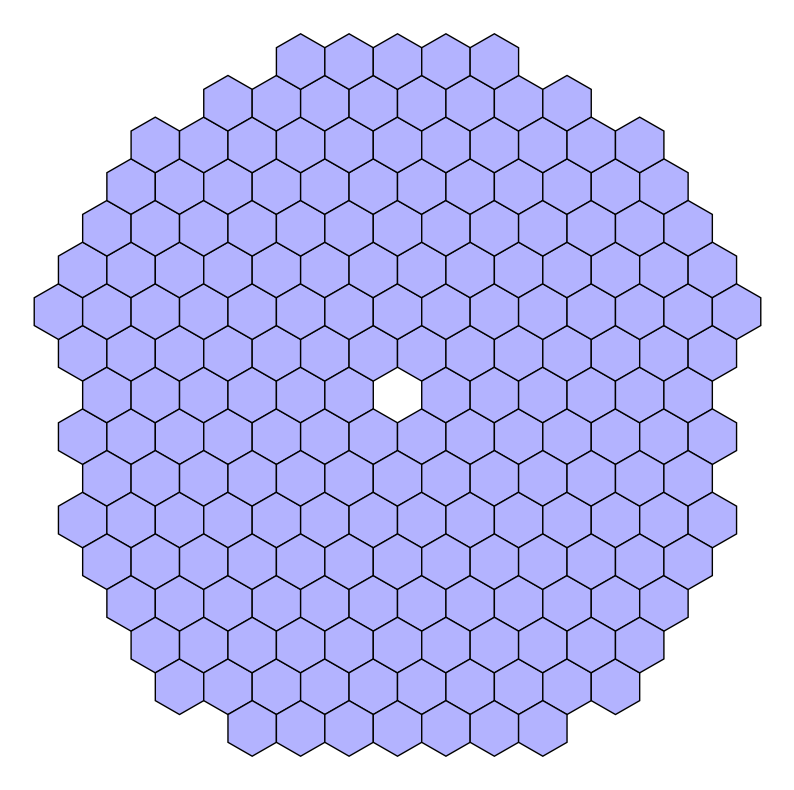

In [6]:
radii = 2/np.sqrt(3)/2
s=np.sqrt(3)/2
cl='#b3b3ff'


fig, ax = plt.subplots(figsize=(10, 10))

rr = np.arange(-7, 8)

for r in rr:
    if r != 0 and  r in rr[1:-1]:
        hexagon = RegularPolygon([r,0], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
        ax.add_artist(hexagon)
    
    for yf in [1,-1]:
        if r in rr[:-1]:
            hexagon = RegularPolygon([r+0.5,s*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)   
            
        if yf == 1:
            hexagon = RegularPolygon([r,s*2*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        elif r in rr[1:-1]:
            hexagon = RegularPolygon([r,s*2*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
            
        if r in rr[:-1]:
            hexagon = RegularPolygon([r+0.5,s*3*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon) 
        if r in rr[1:-1]:
            hexagon = RegularPolygon([r,s*4*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon) 
        if r in rr[1:-2]:
            hexagon = RegularPolygon([r+0.5,s*5*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        if r in rr[2:-2]:
            hexagon = RegularPolygon([r,s*6*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        if yf == 1:
            if r in rr[3:-4]:
                hexagon = RegularPolygon([r+0.5,s*7*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
                ax.add_artist(hexagon)
        else:
            if r in rr[2:-3]:
                hexagon = RegularPolygon([r+0.5,s*7*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
                ax.add_artist(hexagon) 
        if yf == 1:
            if r in rr[5:-5]:
                hexagon = RegularPolygon([r,s*8*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
                ax.add_artist(hexagon) 
        else:
            if r in rr[4:-4]:
                hexagon = RegularPolygon([r,s*8*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
                ax.add_artist(hexagon)             

plt.axis('off')
rad = 8
ax.set_xlim(-rad, rad)
ax.set_ylim(-rad, rad)
plt.savefig(f'{pltpath}LST{formatIm}', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()

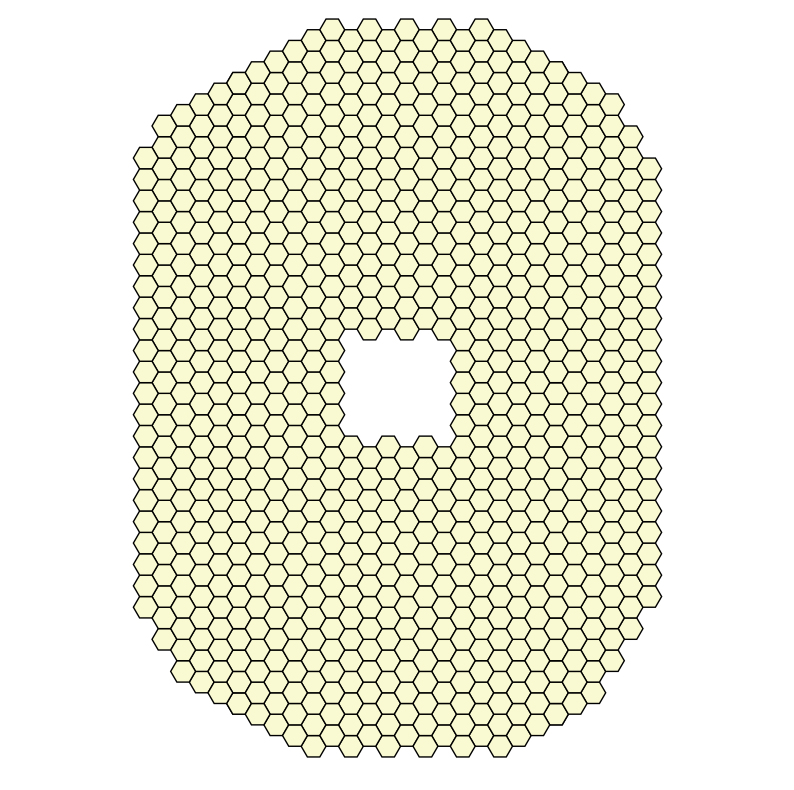

In [530]:
radii = 2/np.sqrt(3)/2*1
s=np.sqrt(3)/2
cl = 'lightgoldenrodyellow'


fig, ax = plt.subplots(figsize=(10, 10))

yy = np.arange(-17, 18)+radii

for y in yy:
    for yf, su, zent in zip([-1,1],[0,0.5],[s/2, -s/2]):
    
        if yf==-1:
            if y in yy[:-1] and y not in yy[15:-15]:
                hexagon = RegularPolygon([s*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[1:]and y not in yy[15:-15]:
            hexagon = RegularPolygon([s*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)    
        if yf==-1:
            if y in yy[:-1] and y not in yy[15:-15]:
                hexagon = RegularPolygon([s*3*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[1:]and y not in yy[15:-15]:
            hexagon = RegularPolygon([s*3*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
            
            
        if yf==-1:
            if y in yy[:-1]:
                hexagon = RegularPolygon([s*5*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[1:]:
            hexagon = RegularPolygon([s*5*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==-1:
            if y in yy[1:-2]:
                hexagon = RegularPolygon([s*7*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[1:-1]:
            hexagon = RegularPolygon([s*7*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==-1:
            if y in yy[2:-3]:
                hexagon = RegularPolygon([s*9*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[2:-2]:
            hexagon = RegularPolygon([s*9*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)

        if yf==-1:
            if y in yy[2:-3]:
                hexagon = RegularPolygon([s*9*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[2:-2]:
            hexagon = RegularPolygon([s*9*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==-1:
            if y in yy[3:-4]:
                hexagon = RegularPolygon([s*11*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[3:-3]:
            hexagon = RegularPolygon([s*11*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==-1:
            if y in yy[5:-5]:
                hexagon = RegularPolygon([s*13*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[6:-5]:
            hexagon = RegularPolygon([s*13*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
            
            
for y in yy:
    for yf, su, zent in zip([-1,1],[0.5,0],[s/2, -s/2]):
        if yf==1:
            if y in yy[:-1]and y not in yy[15:-15]:
                hexagon = RegularPolygon([s*2*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[1:]and y not in yy[15:-15]:
            hexagon = RegularPolygon([s*2*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
            
        if yf==1:
            if y in yy[:-1]:
                hexagon = RegularPolygon([s*4*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[1:]:
            hexagon = RegularPolygon([s*4*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==1:
            if y in yy[:-1]:
                hexagon = RegularPolygon([s*6*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[1:-1]:
            hexagon = RegularPolygon([s*6*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==1:
            if y in yy[1:-2]:
                hexagon = RegularPolygon([s*8*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[2:-2]:
            hexagon = RegularPolygon([s*8*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)


        if yf==1:
            if y in yy[2:-3]:
                hexagon = RegularPolygon([s*10*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[3:-3]:
            hexagon = RegularPolygon([s*10*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==1:
            if y in yy[4:-4]:
                hexagon = RegularPolygon([s*12*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[4:-4]:
            hexagon = RegularPolygon([s*12*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if yf==1:
            if y in yy[7:-7]:
                hexagon = RegularPolygon([s*14*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
                ax.add_artist(hexagon)
        elif y in yy[7:-6]:
            hexagon = RegularPolygon([s*14*yf+zent,y-su], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
             
plt.axis('off')
rad = 36/2
ax.set_xlim(-rad, rad)
ax.set_ylim(-rad, rad)
plt.savefig(f'{pltpath}HESS-28{formatIm}', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()

In [379]:
36*np.sin(np.deg2rad(60))*45*2/100, (14*90+14*np.tan(np.deg2rad(60))*45)/100

(28.05922308261581, 23.51192008768392)

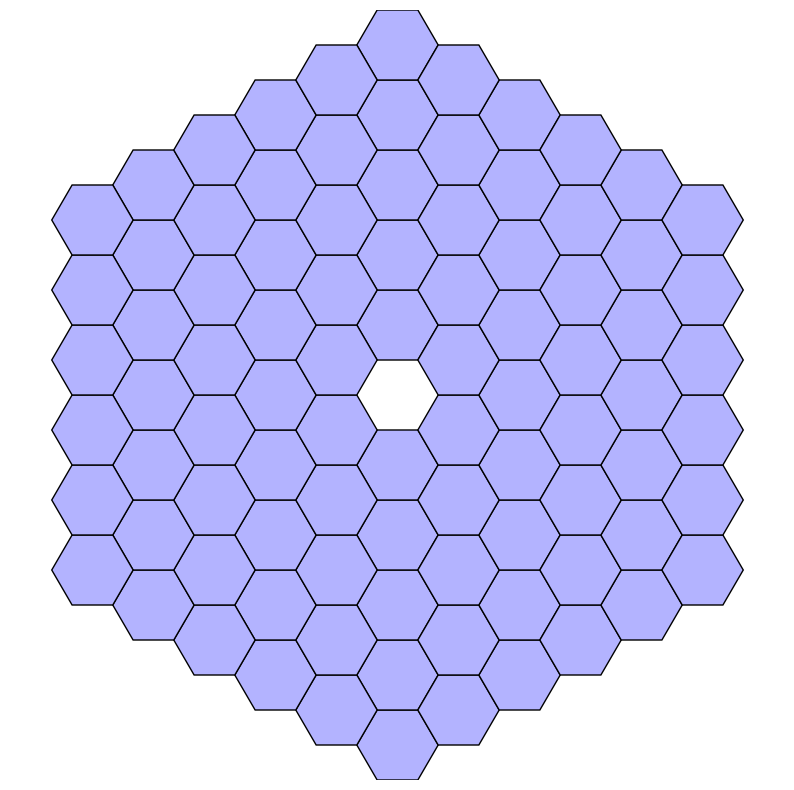

In [537]:
radii = 2/np.sqrt(3)/2
s=np.sqrt(3)/2
cl='#b3b3ff'


fig, ax = plt.subplots(figsize=(10, 10))

yy = np.arange(-5, 6)

for y in yy:
    if y in yy[:] and y != 0:
        hexagon = RegularPolygon([0,y], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
        ax.add_artist(hexagon)
    
    for yf in [-1,1]:
        if y in yy[1:]:
            hexagon = RegularPolygon([s*1*yf,y-0.5], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if y in yy[1:-1]:
            hexagon = RegularPolygon([s*2*yf,y], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if y in yy[2:-1]:
            hexagon = RegularPolygon([s*3*yf,y-0.5], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if y in yy[2:-2]:
            hexagon = RegularPolygon([s*4*yf,y], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
        if y in yy[3:-2]:
            hexagon = RegularPolygon([s*5*yf,y-0.5], numVertices=6, radius=radii, edgecolor='black', facecolor=cl, orientation=np.pi/2)
            ax.add_artist(hexagon)
            
plt.axis('off')
rad = 5.5
ax.set_xlim(-rad, rad)
ax.set_ylim(-rad, rad)
plt.savefig(f'{pltpath}MST{formatIm}', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()

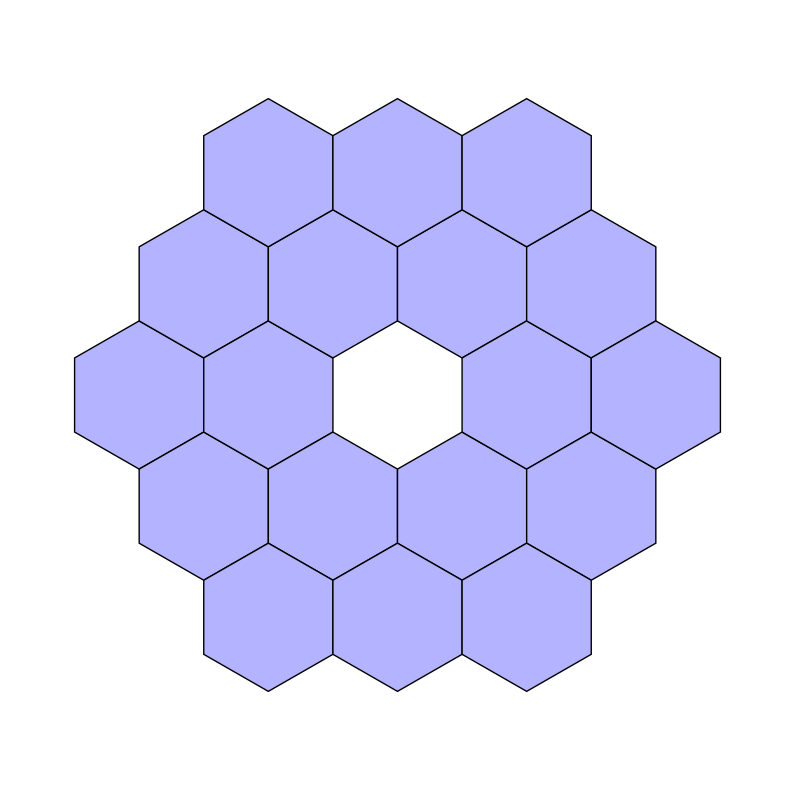

In [538]:
radii = 2/np.sqrt(3)/2
s=np.sqrt(3)/2
cl='#b3b3ff'


fig, ax = plt.subplots(figsize=(10, 10))

rr = np.arange(-2, 3)

for r in rr:
    if r != 0 and  r in rr[:]:
        hexagon = RegularPolygon([r,0], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
        ax.add_artist(hexagon)
    
    for yf in [1,-1]:
        if r in rr[:-1]:
            hexagon = RegularPolygon([r+0.5,s*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)   
            
        if r in rr[1:-1]:
            hexagon = RegularPolygon([r,s*2*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)


plt.axis('off')
rad = 3
ax.set_xlim(-rad, rad)
ax.set_ylim(-rad, rad)
plt.savefig(f'{pltpath}SST{formatIm}', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()

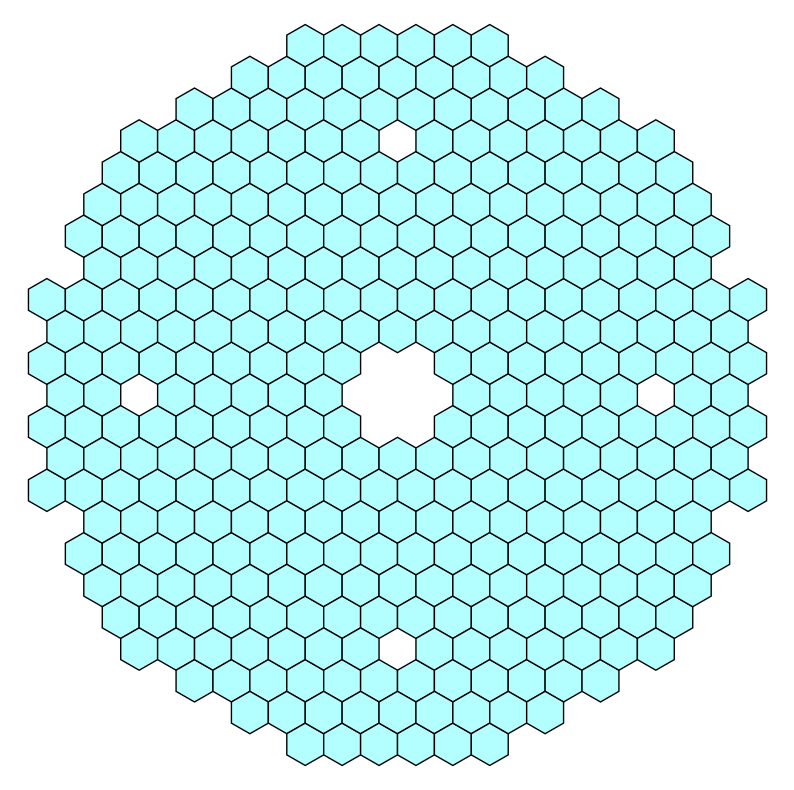

In [531]:
radii = 2/np.sqrt(3)/2
s=np.sqrt(3)/2
cl='#b3ffff'


fig, ax = plt.subplots(figsize=(10, 10))

rr = np.arange(-10, 11)

for r in rr:
    if r != 0 and  r not in rr[9:-9] and r!=-7 and r!=7 and r in rr[1:-1]:
        hexagon = RegularPolygon([r,0], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
        ax.add_artist(hexagon)
    
    for yf in [1,-1]:
        if r in rr[:-1] and r not in rr[9:-10]:
            hexagon = RegularPolygon([r+0.5,s*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)   
            
        if r in rr[1:-1]:
            hexagon = RegularPolygon([r,s*2*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
            
        if r in rr[:-1]:
            hexagon = RegularPolygon([r+0.5,s*3*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon) 
            
        if r in rr[2:-2]:
            hexagon = RegularPolygon([r,s*4*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon) 
            
        if r in rr[1:-2]:
            hexagon = RegularPolygon([r+0.5,s*5*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        if r in rr[2:-2]:
            hexagon = RegularPolygon([r,s*6*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        if r in rr[2:-3]:
            hexagon = RegularPolygon([r+0.5,s*7*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon) 
        if r in rr[3:-3] and r not in rr[10:-10]:
            hexagon = RegularPolygon([r,s*8*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        if r in rr[4:-5]:
            hexagon = RegularPolygon([r+0.5,s*9*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        if r in rr[6:-6]:
            hexagon = RegularPolygon([r,s*10*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)
        if r in rr[7:-8]:
            hexagon = RegularPolygon([r+0.5,s*11*yf], numVertices=6, radius=radii, edgecolor='black', facecolor=cl)
            ax.add_artist(hexagon)

plt.axis('off')
rad = 10.5
ax.set_xlim(-rad, rad)
ax.set_ylim(-rad, rad)
plt.savefig(f'{pltpath}VERITAS{formatIm}', bbox_inches='tight', dpi=dpi, transparent=True)
plt.show()